# TASK-5
### SALES PREDICTION USING PYTHON

### Problem Statement:
 
     Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product. Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

### Dataset:
https://www.kaggle.com/datasets/bumba5341/advertisingcsv

### Github:
https://github.com/charankumar-77/OIBSIP.git 

### Name: Charan Mandula
### Email: charanmandula07@gmail.com

#### Import Library


In [1]:
#import libraries for analysing and visualization
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
#import libraries for Training/Testing, Model selection 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# import libraries for evaluatin model performance 
from sklearn.metrics import accuracy_score,r2_score
from sklearn.metrics import classification_report 

#### Load Dataset

In [2]:
#Load the dataset 
df=pd.read_csv("Advertising.csv")

In [3]:
# Displaying first 5 records 
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Displaying last 5 records 
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [5]:
#Information about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
#size of the dataset (Rows & columns)
df.shape


(200, 5)

In [7]:
# Print Column Names Only
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# Summary statistics
# if std is 0, that column should be removed from analysis
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


#### Drop unimportant columns

In [9]:
# Remove unimportant column:Id
df.drop(['Unnamed: 0'],axis=1, inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#### Check for Null Values and Manipulate Data, if Null values found

In [10]:
#Finding the null values 
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [11]:
# This will display rows with at least one null value across all columns
rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,TV,Radio,Newspaper,Sales


####  Check for Duplicates and Drop those Rows, if Duplicates found

In [12]:
# This will display all duplicate rows (excluding the first occurrence)
duplicate_rows = df[df.duplicated()]
duplicate_rows

,TV,Radio,Newspaper,Sales


In [13]:
# This will display all duplicate rows (including the first occurrence)
all_duplicate_rows = df[df.duplicated(keep=False)]
all_duplicate_rows

,TV,Radio,Newspaper,Sales


#### Correlation Analysis to Indetify Dependend and Independent Variables

In [14]:
# find correlations between all columns
df.corr(method='pearson')

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


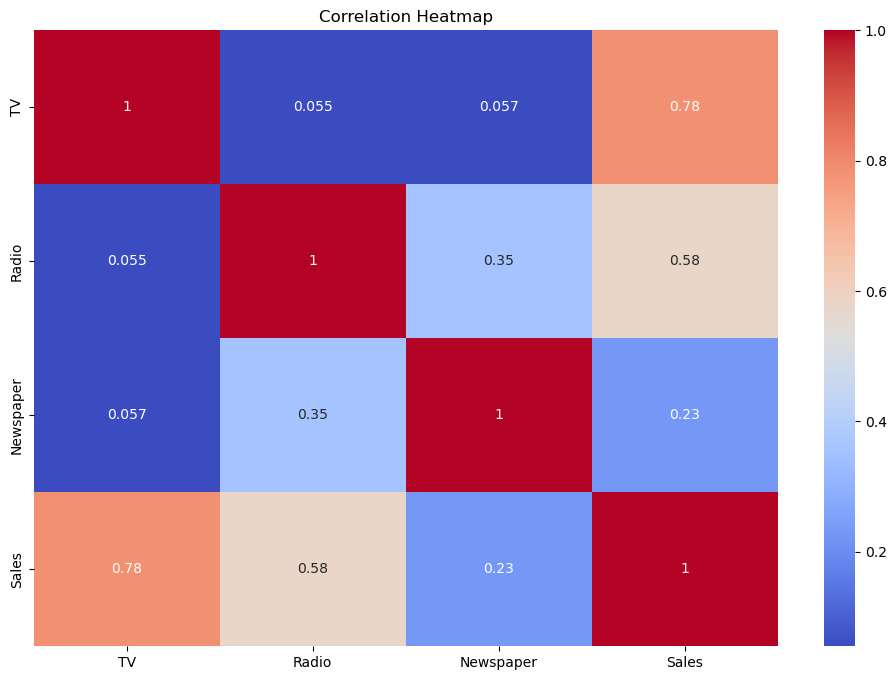

In [15]:
# Calculate correlation matrix
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Data Visualization

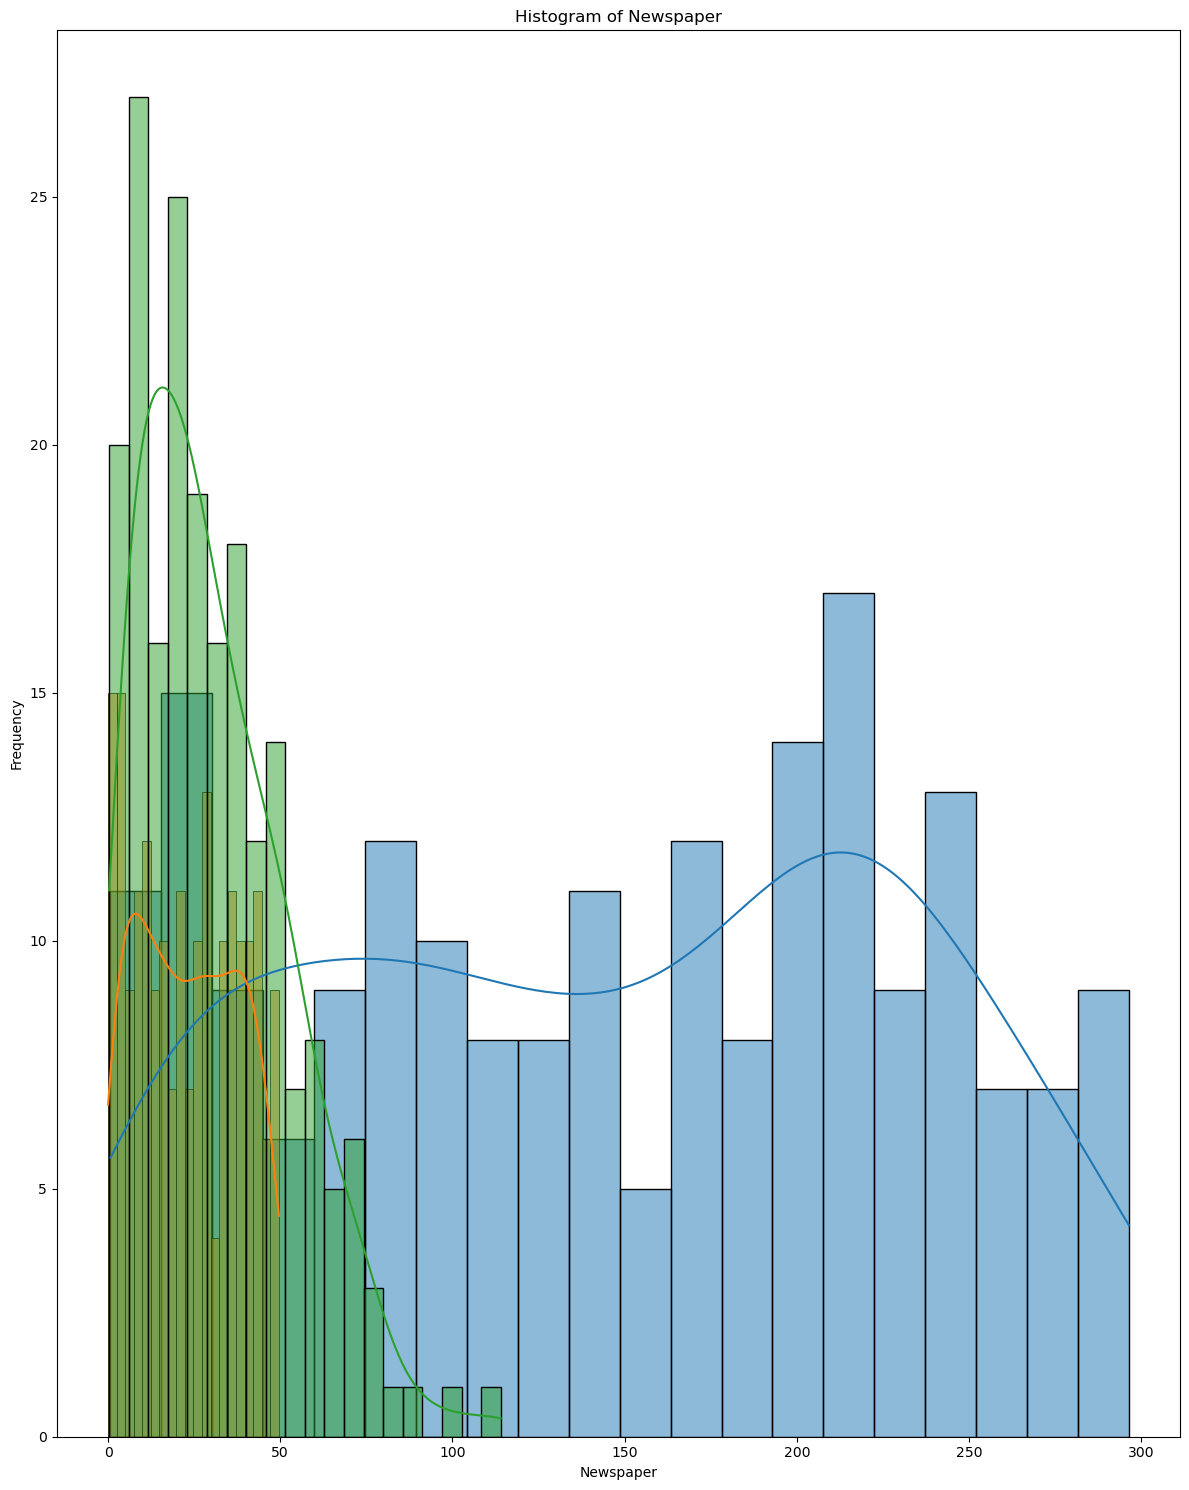

In [16]:
# Histogram 
# Select only numeric type of columns by their names as:
df1 = df[['TV','Radio','Newspaper']]
df1
# Create subplots for the histograms
plt.figure(figsize=(12, 15))
for i, var in enumerate(df1, 1):
    sns.histplot(df[var], bins=20, kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Apply Machine Learning Algorithm

In [17]:
# Select only numeric type of columns by their names as:
x = df[['TV','Radio','Newspaper']]
x


,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [18]:
# Select only numeric type of columns by their names as:
y = df[['Sales']]
y


,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


#### Import Machine Leaning Libraries and Split Dataset

In [19]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")

X_train: (160, 3)
X_test: (40, 3)


#### Create and Fit Model

In [20]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
linear_model = LinearRegression()

# Fit the linear regression model to the training data
linear_model.fit(X_train, y_train)


LinearRegression()

In [21]:
# Make predictions on the test data
y_pred = linear_model.predict(X_test)

In [22]:
# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 3.17
R^2 Score: 0.90


#### Make Predictions with New Data

In [23]:
# # Make predictions on the New data
TV = 230.1
Radio = 37.8
Newspaper = 69.2

y_pred = linear_model.predict([[TV,Radio,Newspaper]])
print(f"Predicted Value: {y_pred[0]}")

Predicted Value: [20.61397147]


C:\Users\91812\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
